#### Import all the necessary modules

In [1]:
import pandas as pd
from sklearn.utils import resample
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import silhouette_score, adjusted_rand_score
import time
import psutil
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

#### Read data from ransomware dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Ransomware.csv to Ransomware.csv


In [5]:
df = pd.read_csv(io.BytesIO(uploaded['Ransomware.csv']), sep='|')
df

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Name                         138047 non-null  object 
 1   md5                          138047 non-null  object 
 2   Machine                      138047 non-null  int64  
 3   SizeOfOptionalHeader         138047 non-null  int64  
 4   Characteristics              138047 non-null  int64  
 5   MajorLinkerVersion           138047 non-null  int64  
 6   MinorLinkerVersion           138047 non-null  int64  
 7   SizeOfCode                   138047 non-null  int64  
 8   SizeOfInitializedData        138047 non-null  int64  
 9   SizeOfUninitializedData      138047 non-null  int64  
 10  AddressOfEntryPoint          138047 non-null  int64  
 11  BaseOfCode                   138047 non-null  int64  
 12  BaseOfData                   138047 non-null  int64  
 13 

#### Split dataset into legitimate data and ransomware data

In [7]:
# Separate ransomware and legitimate data
ransomware = df[df['legitimate'] == 0]
legitimate = df[df['legitimate'] == 1]

In [8]:
#Number of ransomare data
ransomware

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
41323,VirusShare_4a400b747afe6547e09ce0b02dae7f1c,4a400b747afe6547e09ce0b02dae7f1c,332,224,258,11,0,354816,257024,0,...,7,3.914415,1.441688,7.677091,7298.428571,16,28438,72,0,0
41324,VirusShare_9bd57c8252948bd2fa651ad372bd4f13,9bd57c8252948bd2fa651ad372bd4f13,332,224,271,6,0,24064,164864,1024,...,6,3.199107,1.971335,5.214816,452.000000,34,958,0,15,0
41325,VirusShare_d1456165e9358b8f61f93a5f2042f39c,d1456165e9358b8f61f93a5f2042f39c,332,224,258,10,0,118784,381952,0,...,18,6.530946,2.458492,7.992688,18523.444444,48,33945,72,14,0
41326,VirusShare_e4214cc73afbba0f52bb72d5db8f8bb1,e4214cc73afbba0f52bb72d5db8f8bb1,332,224,258,10,0,174592,300032,0,...,15,5.732393,2.852364,7.987726,12706.133333,118,60500,72,14,0
41327,VirusShare_710890c07b3f93b90635f8bff6c34605,710890c07b3f93b90635f8bff6c34605,332,224,258,9,0,475648,348672,0,...,59,2.827826,0.960953,7.212329,2637.033898,20,67624,72,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [9]:
#Number of legitimate data
legitimate

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41318,mfc80.dll,1f5afd468eb5e09e9ed75a087529eab5,332,224,8450,8,0,946176,159744,0,...,123,2.607251,0.960953,5.130762,327.170732,20,1592,72,16,1
41319,mfc80u.dll,e2c48cd0132d4d1dc7d0df9a6bef686a,332,224,8450,8,0,946176,154624,0,...,123,2.607232,0.960953,5.130762,327.235772,20,1592,72,16,1
41320,mfcm80.dll,83362ee950ad18adb85b54409155c378,332,224,8450,8,0,53248,16384,0,...,1,3.524268,3.524268,3.524268,892.000000,892,892,72,16,1
41321,mfcm80u.dll,26aafee5c30020c99120ee113d751f7e,332,224,8450,8,0,52736,11264,0,...,1,3.542071,3.542071,3.542071,892.000000,892,892,72,16,1


#### Undersample ransomware data to match the size of normal samples

In [10]:
# Undersample ransomware data to match the size of legitimate data
ransomware_undersampled = resample(ransomware,
                                   replace=False,    # sample without replacement
                                   n_samples=len(legitimate),  # match number of legitimate rows
                                   random_state=42)  # for reproducibility


In [11]:
# Combine undersampled ransomware data with legitimate data
balanced_df = pd.concat([ransomware_undersampled, legitimate])

# Shuffle the data to mix ransomware and legitimate
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [12]:
balanced_df

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,VirusShare_868558943d957d340f1061b7a155beb0,868558943d957d340f1061b7a155beb0,332,224,258,10,0,118784,382464,0,...,26,6.978097,2.458492,7.988532,12840.384615,48,20394,72,14,0
1,WcsPlugInService.dll,20f7441334b18cee52027661df4a6129,34404,240,8226,9,0,30720,11264,0,...,5,3.520158,2.884317,4.851024,1057.200000,232,1692,0,16,1
2,wuapi.dll,330e69f06a428a0ab0568969532636fb,34404,240,8226,9,0,327168,367616,0,...,40,4.802285,2.865892,6.270972,5084.600000,132,81712,0,16,1
3,VirusShare_12083929580343e871d5ece5e49f6ff9,12083929580343e871d5ece5e49f6ff9,332,224,271,6,0,23552,117760,1024,...,5,3.334884,2.160964,5.257009,425.600000,20,784,0,12,0
4,taskcomp.dll,ef8808fea65723214d79734bdb79ebf6,332,224,8450,9,0,243200,60416,0,...,2,3.113164,2.657930,3.568398,580.000000,200,960,72,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82641,VirusShare_531c66ac3e29570666e07f7df4284cec,531c66ac3e29570666e07f7df4284cec,332,224,258,10,0,120320,385024,0,...,6,3.671986,2.458492,5.317552,2739.500000,48,9640,72,15,0
82642,KBDFC.DLL,853ceeeddc0cfa1ba000d29fa46e9365,332,224,8450,9,0,0,6656,0,...,1,3.577676,3.577676,3.577676,932.000000,932,932,0,16,1
82643,TSpkg.dll,91aad383cca1df75d39b88848d28ac08,34404,240,8226,9,0,61952,24064,0,...,3,6.185642,3.573823,7.491551,826.666667,776,928,0,16,1
82644,VirusShare_9c2c4a2ae763317d1e21becea0b9191e,9c2c4a2ae763317d1e21becea0b9191e,332,224,258,10,0,117248,389632,0,...,5,3.312743,2.674420,3.764385,2517.600000,48,7336,72,14,0


Check for null columns in the data


In [13]:
# Find rows with any missing values
rows_with_missing = df[df.isnull().any(axis=1)]

# Display rows with missing values
print(rows_with_missing)

Empty DataFrame
Columns: [Name, md5, Machine, SizeOfOptionalHeader, Characteristics, MajorLinkerVersion, MinorLinkerVersion, SizeOfCode, SizeOfInitializedData, SizeOfUninitializedData, AddressOfEntryPoint, BaseOfCode, BaseOfData, ImageBase, SectionAlignment, FileAlignment, MajorOperatingSystemVersion, MinorOperatingSystemVersion, MajorImageVersion, MinorImageVersion, MajorSubsystemVersion, MinorSubsystemVersion, SizeOfImage, SizeOfHeaders, CheckSum, Subsystem, DllCharacteristics, SizeOfStackReserve, SizeOfStackCommit, SizeOfHeapReserve, SizeOfHeapCommit, LoaderFlags, NumberOfRvaAndSizes, SectionsNb, SectionsMeanEntropy, SectionsMinEntropy, SectionsMaxEntropy, SectionsMeanRawsize, SectionsMinRawsize, SectionMaxRawsize, SectionsMeanVirtualsize, SectionsMinVirtualsize, SectionMaxVirtualsize, ImportsNbDLL, ImportsNb, ImportsNbOrdinal, ExportNb, ResourcesNb, ResourcesMeanEntropy, ResourcesMinEntropy, ResourcesMaxEntropy, ResourcesMeanSize, ResourcesMinSize, ResourcesMaxSize, LoadConfigurati

In [14]:
numeric_features = balanced_df.select_dtypes(include=['float64', 'int64']).columns

Performing Transformation on the data

In [15]:
def categorize_attributes(df, threshold_skewness=0.5):
    # Dictionary to store attribute categories
    attribute_groups = {
        'normalization': [],
        'standardization': [],
        'power_transformation': []
    }

    # Loop over numerical columns to assess skewness
    for col in df.select_dtypes(include=[np.number]).columns:
        skewness = df[col].skew()

        # Group columns based on skewness
        if abs(skewness) < threshold_skewness:
            attribute_groups['standardization'].append(col)
        elif skewness > threshold_skewness or skewness < -threshold_skewness:
            attribute_groups['power_transformation'].append(col)
        else:
            attribute_groups['normalization'].append(col)

    return attribute_groups


#### Splitting the attributes into three different categories to apply normalization, standardization and power transformation.

In [16]:
groups = categorize_attributes(balanced_df)

# Output grouped attributes
print("Standardization group:", groups['standardization'])
print("Power Transformation group:", groups['power_transformation'])
print("Normalization group:", groups['normalization'])

groups['standardization'].pop()

Standardization group: ['MajorSubsystemVersion', 'DllCharacteristics', 'SizeOfHeapReserve', 'SectionsMinEntropy', 'ResourcesMaxEntropy', 'legitimate']
Power Transformation group: ['Machine', 'SizeOfOptionalHeader', 'Characteristics', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase', 'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion', 'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion', 'MinorSubsystemVersion', 'SizeOfImage', 'SizeOfHeaders', 'CheckSum', 'Subsystem', 'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb', 'SectionsMeanEntropy', 'SectionsMaxEntropy', 'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize', 'SectionsMeanVirtualsize', 'SectionsMinVirtualsize', 'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb', 'ImportsNbOrdinal', 'ExportNb', 'Res

'legitimate'

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

# Initialize scalers
scaler = StandardScaler()
normalizer = MinMaxScaler()
power_transformer = PowerTransformer(method='yeo-johnson')

transformed_df = balanced_df.copy()

# Apply different scalings
transformed_df[groups['standardization']] = scaler.fit_transform(transformed_df[groups['standardization']])
transformed_df[groups['power_transformation']] = power_transformer.fit_transform(transformed_df[groups['power_transformation']])


In [18]:
transformed_df.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,VirusShare_868558943d957d340f1061b7a155beb0,868558943d957d340f1061b7a155beb0,-0.487558,-2.775558e-17,-0.894729,0.541940,-0.385949,0.258079,0.812257,-0.307674,...,1.182562,2.870069,-0.192823,1.704346,1.076381,-0.527257,0.520126,0.971825,-0.085086,0
1,WcsPlugInService.dll,20f7441334b18cee52027661df4a6129,2.051151,8.326673e-17,0.937485,0.191129,-0.385949,-0.370913,-0.909323,-0.307674,...,-0.031681,-0.352520,0.338727,-0.242545,-0.491967,0.517460,-0.641502,-1.006337,0.364544,1
2,wuapi.dll,330e69f06a428a0ab0568969532636fb,2.051151,8.326673e-17,0.937485,0.191129,-0.385949,0.846523,0.786809,-0.307674,...,1.426796,0.895758,0.314872,0.638564,0.487561,0.148302,1.169524,-1.006337,0.364544,1
3,VirusShare_12083929580343e871d5ece5e49f6ff9,12083929580343e871d5ece5e49f6ff9,-0.487558,-2.775558e-17,-0.868401,-0.962072,-0.385949,-0.476705,0.122190,3.249372,...,-0.031681,-0.539677,-0.539158,0.009378,-1.048423,-1.119224,-0.999491,-1.006337,-0.499706,0
4,taskcomp.dll,ef8808fea65723214d79734bdb79ebf6,-0.487558,-2.775558e-17,0.951505,0.191129,-0.385949,0.662464,-0.212981,-0.307674,...,-0.826127,-0.766255,0.050954,-1.038441,-0.860062,0.420891,-0.905301,0.971825,0.364544,1


Plotting heatmap for the correlation matrix using Pearson method

In [31]:
plt.rc('font', family='Times New Roman')

In [23]:
import matplotlib.font_manager as fm
print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))

['/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationS

In [36]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

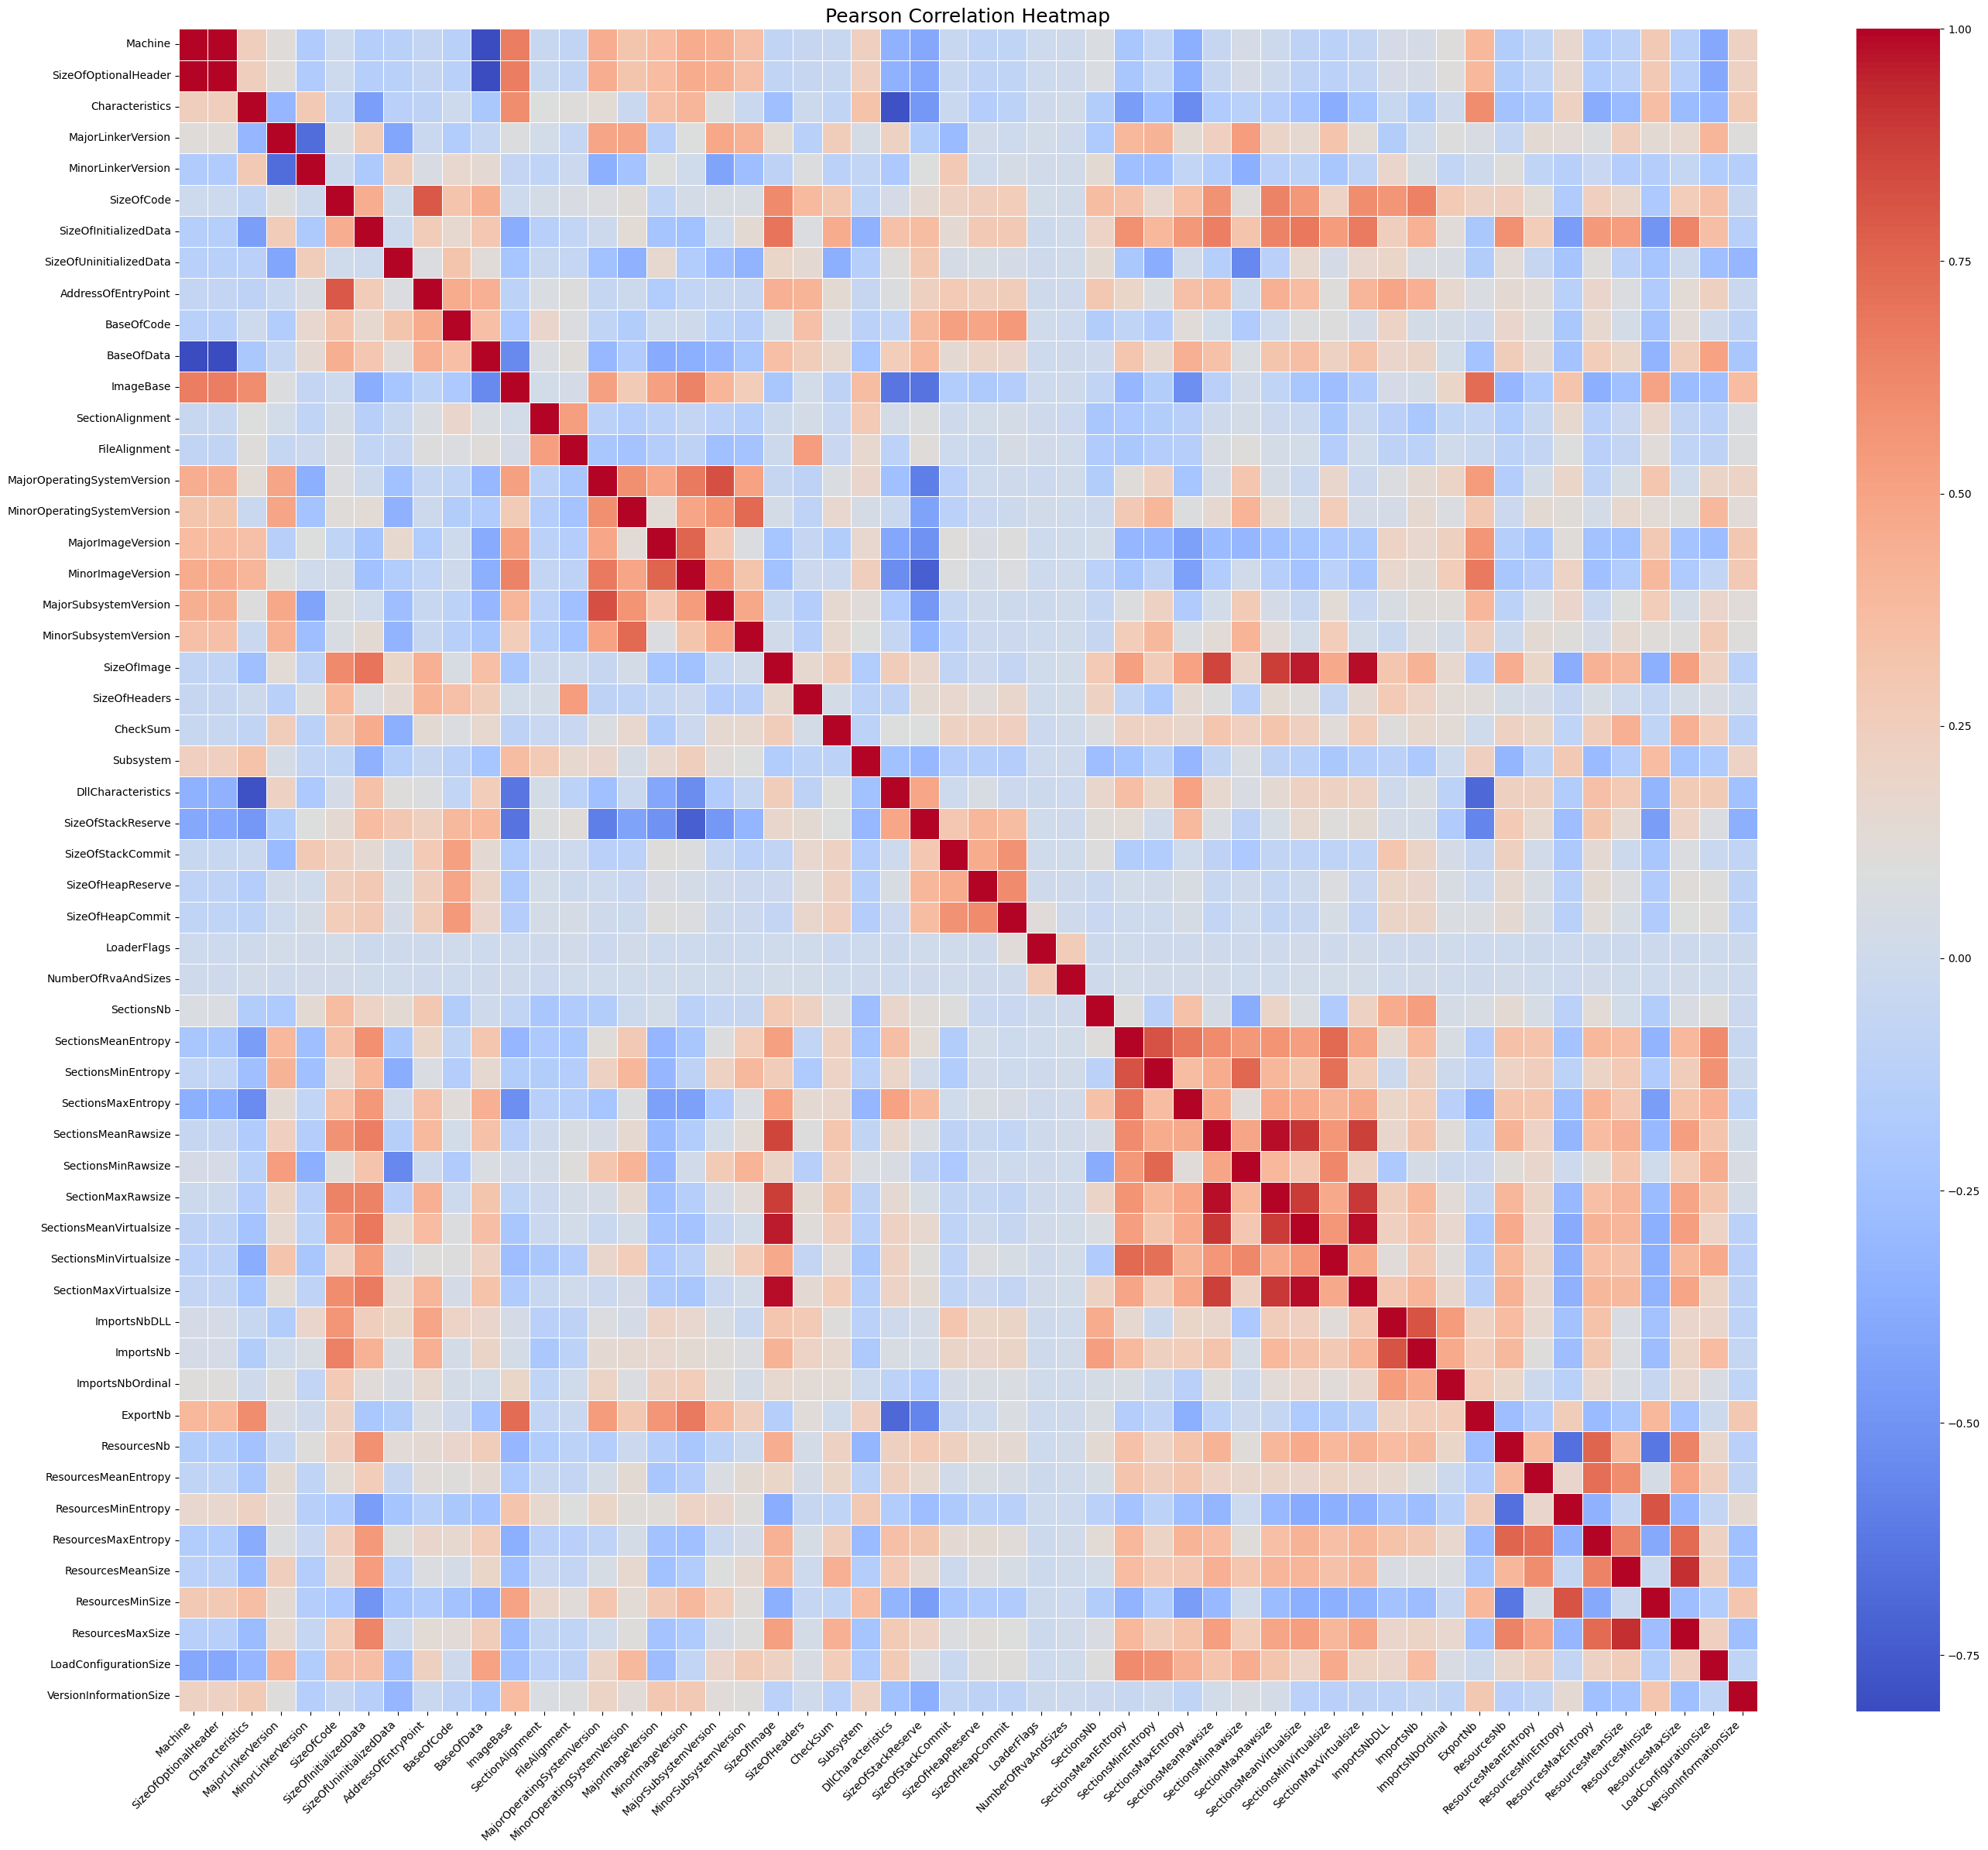

In [37]:
# Step 2: Set up the font in matplotlib
import matplotlib.font_manager as fm
import seaborn as sns
import matplotlib.pyplot as plt

# Load the downloaded font
font_path = r'/content/Times New Roman.ttf'
prop = fm.FontProperties(fname=font_path)

# Set the custom font globally
plt.rcParams['font.family'] = prop.get_name()

df_numeric = transformed_df.drop(columns=['Name', 'md5', 'legitimate'])

# Calculate correlation matrices for Pearson, Kendall, and Spearman
pearson_corr = df_numeric.corr(method='pearson')

# Plot heatmaps for each correlation matrix
def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(28, 24))  # Increased figure size
    sns.heatmap(corr_matrix, annot=False, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title(f'{title} Correlation Heatmap', fontsize=18)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.yticks(rotation=0)
    plt.tight_layout()  # Adjusts subplots to fit the figure area
    plt.show()

# Plotting heatmaps
plot_heatmap(pearson_corr, 'Pearson')

Finding highly correlated features using threshhold value 0.8

In [ ]:
import numpy as np

def get_high_corr_pairs(corr_matrix, threshold):
  mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)  # Ignore diagonal and upper triangle
  high_corr = corr_matrix.where(mask).stack().reset_index()
  high_corr.columns = ['Feature1', 'Feature2', 'Correlation']
  return high_corr[high_corr['Correlation'].abs() >= threshold]


# Find highly correlated feature pairs in each correlation matrix
pearson_high_corr = get_high_corr_pairs(pearson_corr, threshold = 0.8)
pearson_high_corr_second = get_high_corr_pairs(pearson_corr, threshold = 0.9)

pearson_pairs = set([tuple(sorted([row['Feature1'], row['Feature2']])) for _, row in pearson_high_corr.iterrows()])
pearson_pairs_second = set([tuple(sorted([row['Feature1'], row['Feature2']])) for _, row in pearson_high_corr_second.iterrows()])

common_pairs_second = pearson_pairs & pearson_pairs_second

common_pairs_second

{('Machine', 'SizeOfOptionalHeader'),
 ('ResourcesMaxSize', 'ResourcesMeanSize'),
 ('SectionMaxRawsize', 'SectionsMeanRawsize'),
 ('SectionMaxVirtualsize', 'SectionsMeanVirtualsize'),
 ('SectionMaxVirtualsize', 'SizeOfImage'),
 ('SectionsMeanRawsize', 'SectionsMeanVirtualsize'),
 ('SectionsMeanVirtualsize', 'SizeOfImage')}

Finding highly correlated features using thresh hold value 0.8

In [ ]:
pearson_pairs

{('AddressOfEntryPoint', 'SizeOfCode'),
 ('BaseOfData', 'Machine'),
 ('BaseOfData', 'SizeOfOptionalHeader'),
 ('ImportsNb', 'ImportsNbDLL'),
 ('Machine', 'SizeOfOptionalHeader'),
 ('MajorOperatingSystemVersion', 'MajorSubsystemVersion'),
 ('ResourcesMaxSize', 'ResourcesMeanSize'),
 ('ResourcesMinEntropy', 'ResourcesMinSize'),
 ('SectionMaxRawsize', 'SectionMaxVirtualsize'),
 ('SectionMaxRawsize', 'SectionsMeanRawsize'),
 ('SectionMaxRawsize', 'SectionsMeanVirtualsize'),
 ('SectionMaxRawsize', 'SizeOfImage'),
 ('SectionMaxVirtualsize', 'SectionsMeanRawsize'),
 ('SectionMaxVirtualsize', 'SectionsMeanVirtualsize'),
 ('SectionMaxVirtualsize', 'SizeOfImage'),
 ('SectionsMeanEntropy', 'SectionsMinEntropy'),
 ('SectionsMeanRawsize', 'SectionsMeanVirtualsize'),
 ('SectionsMeanRawsize', 'SizeOfImage'),
 ('SectionsMeanVirtualsize', 'SizeOfImage')}

#### Finding highly correlated values using threshhold value - 0.9

In [ ]:
pearson_pairs_second

{('Machine', 'SizeOfOptionalHeader'),
 ('ResourcesMaxSize', 'ResourcesMeanSize'),
 ('SectionMaxRawsize', 'SectionsMeanRawsize'),
 ('SectionMaxVirtualsize', 'SectionsMeanVirtualsize'),
 ('SectionMaxVirtualsize', 'SizeOfImage'),
 ('SectionsMeanRawsize', 'SectionsMeanVirtualsize'),
 ('SectionsMeanVirtualsize', 'SizeOfImage')}

In order to find Feature importance, we will find Mutual Information
We drop the columns with categorical values and find mutual information in association with legitimate.

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi_df = df.copy()
mi_df = mi_df.drop(columns=['Name', 'md5'])

mi_scores = mutual_info_classif(mi_df.drop('legitimate', axis=1), mi_df['legitimate'])
mi_scores = pd.Series(mi_scores, index=mi_df.drop('legitimate', axis=1).columns)
mi_df = pd.DataFrame({'Mutual Information': mi_scores})

We visualize the mutual information values for the various attributes

In [29]:
plt.rc('font', family='Times New Roman')

In [30]:
import matplotlib.pyplot as plt

# Sort mutual information values in descending order
sorted_mi = mi_df.sort_values(by='Mutual Information', ascending=False)

# Plot the MI values as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_mi.index, sorted_mi['Mutual Information'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.title("Mutual Information of Features")
plt.xlabel("Features")
plt.ylabel("Mutual Information")

# Show the plot with adjusted layout
plt.tight_layout()
plt.show()


NameError: name 'mi_df' is not defined

We will set the threshhold value for MI at 0.25 and select the attributes for the model

In [ ]:
# Get the list of attributes with mutual information less than 0.25
low_mi_attributes = mi_df[mi_df['Mutual Information'] < 0.25].index.tolist()
low_mi_attributes

['Machine',
 'SizeOfOptionalHeader',
 'MinorLinkerVersion',
 'SizeOfUninitializedData',
 'BaseOfCode',
 'SectionAlignment',
 'FileAlignment',
 'MinorOperatingSystemVersion',
 'MajorImageVersion',
 'MajorSubsystemVersion',
 'MinorSubsystemVersion',
 'SizeOfHeaders',
 'SizeOfStackCommit',
 'SizeOfHeapReserve',
 'SizeOfHeapCommit',
 'LoaderFlags',
 'NumberOfRvaAndSizes',
 'SectionsNb',
 'ImportsNbDLL',
 'ImportsNbOrdinal',
 'LoadConfigurationSize']

In [ ]:
# Get the list of attributes with mutual information less than 0.1
low_mi_attributes = mi_df[mi_df['Mutual Information'] < 0.1].index.tolist()
low_mi_attributes

['MinorLinkerVersion',
 'SizeOfUninitializedData',
 'BaseOfCode',
 'SectionAlignment',
 'FileAlignment',
 'MinorOperatingSystemVersion',
 'MinorSubsystemVersion',
 'SizeOfHeaders',
 'SizeOfStackCommit',
 'SizeOfHeapReserve',
 'SizeOfHeapCommit',
 'LoaderFlags',
 'NumberOfRvaAndSizes',
 'ImportsNbOrdinal',
 'LoadConfigurationSize']

In [ ]:
# Get the list of attributes with mutual information less than 0.01
low_mi_attributes = mi_df[mi_df['Mutual Information'] < 0.01].index.tolist()
low_mi_attributes

['LoaderFlags', 'NumberOfRvaAndSizes']

#### Choosing attribute from highly correlated attributes - we choose the attribute with higher mutual information value

In [ ]:
correlated_pairs = [
    ('Machine', 'SizeOfOptionalHeader'),
    ('ResourcesMaxSize', 'ResourcesMeanSize'),
    ('SectionMaxRawsize', 'SectionsMeanRawsize'),
    ('SectionMaxVirtualsize', 'SectionsMeanVirtualsize'),
    ('SectionMaxVirtualsize', 'SizeOfImage'),
    ('SectionsMeanRawsize', 'SectionsMeanVirtualsize'),
    ('SectionsMeanVirtualsize', 'SizeOfImage')
]

retained_attributes = []

# Iterate over each pair of correlated attributes
for pair in correlated_pairs:
    attr1, attr2 = pair

    # Get the mutual information values for each attribute
    mi_attr1 = mi_df.loc[attr1, 'Mutual Information']
    mi_attr2 = mi_df.loc[attr2, 'Mutual Information']

    # Compare mutual information and drop the attribute with the lower value
    if mi_attr1 < mi_attr2:
        print(f"Keeping {attr2} as it has higher MI: {mi_attr1} < {mi_attr2}")
        retained_attributes.append(attr2)
        # mi_df.drop(attr1, inplace=True)
    else:
        print(f"Keeping {attr1} as it has higher MI: {mi_attr2} < {mi_attr1}")
        retained_attributes.append(attr1)
        # mi_df.drop(attr2, inplace=True)


Keeping SizeOfOptionalHeader as it has higher MI: 0.1539232078812487 < 0.1723930949301744
Keeping ResourcesMeanSize as it has higher MI: 0.48724946054861995 < 0.4937360156660966
Keeping SectionsMeanRawsize as it has higher MI: 0.3689773089625652 < 0.40753963184309594
Keeping SectionMaxVirtualsize as it has higher MI: 0.45288726840848703 < 0.47593382010647445
Keeping SectionMaxVirtualsize as it has higher MI: 0.31153184126572797 < 0.47593382010647445
Keeping SectionsMeanVirtualsize as it has higher MI: 0.40753963184309594 < 0.45288726840848703
Keeping SectionsMeanVirtualsize as it has higher MI: 0.31153184126572797 < 0.45288726840848703


In [ ]:
retained_attributes

['SizeOfOptionalHeader',
 'ResourcesMeanSize',
 'SectionsMeanRawsize',
 'SectionMaxVirtualsize',
 'SectionMaxVirtualsize',
 'SectionsMeanVirtualsize',
 'SectionsMeanVirtualsize']

#### Choose the required columns (having Mutual Information > 0.25)

In [ ]:
required_columns = mi_df[mi_df['Mutual Information'] > 0.25].index.tolist()

feature_reduced_df = pd.DataFrame()
feature_reduced_df[required_columns] = transformed_df[required_columns]
feature_reduced_df['legitimate'] = transformed_df['legitimate']
feature_reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82646 entries, 0 to 82645
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Characteristics              82646 non-null  float64
 1   MajorLinkerVersion           82646 non-null  float64
 2   SizeOfCode                   82646 non-null  float64
 3   SizeOfInitializedData        82646 non-null  float64
 4   AddressOfEntryPoint          82646 non-null  float64
 5   BaseOfData                   82646 non-null  float64
 6   ImageBase                    82646 non-null  float64
 7   MajorOperatingSystemVersion  82646 non-null  float64
 8   MinorImageVersion            82646 non-null  float64
 9   SizeOfImage                  82646 non-null  float64
 10  CheckSum                     82646 non-null  float64
 11  Subsystem                    82646 non-null  float64
 12  DllCharacteristics           82646 non-null  float64
 13  SizeOfStackReser

In [ ]:
feature_reduced_df.head()

,Characteristics,MajorLinkerVersion,SizeOfCode,SizeOfInitializedData,AddressOfEntryPoint,BaseOfData,ImageBase,MajorOperatingSystemVersion,MinorImageVersion,SizeOfImage,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,VersionInformationSize,legitimate
0,-0.894729,0.541940,0.258079,0.812257,0.302712,0.524661,-0.828301,-0.122970,-0.724506,0.443813,...,-0.681546,1.182562,2.870069,-0.192823,1.704346,1.076381,-0.527257,0.520126,-0.085086,0
1,0.937485,0.191129,-0.370913,-0.909323,-0.088360,-1.662472,1.737778,1.148133,1.304312,-1.090428,...,1.120038,-0.031681,-0.352520,0.338727,-0.242545,-0.491967,0.517460,-0.641502,0.364544,1
2,0.937485,0.191129,0.846523,0.786809,-0.283639,-1.662472,1.727166,1.148133,1.304312,0.674571,...,1.349836,1.426796,0.895758,0.314872,0.638564,0.487561,0.148302,1.169524,0.364544,1
3,-0.868401,-0.962072,-0.476705,0.122190,-0.386241,-0.033794,-0.828301,-1.157404,-0.724506,-0.276871,...,-0.681546,-0.031681,-0.539677,-0.539158,0.009378,-1.048423,-1.119224,-0.999491,-0.499706,0
4,0.951505,0.191129,0.662464,-0.212981,-0.396592,0.843933,1.015070,1.148133,1.304312,0.079556,...,1.470306,-0.826127,-0.766255,0.050954,-1.038441,-0.860062,0.420891,-0.905301,0.364544,1


In [ ]:
df.to_csv('feature_reduced_df.csv', index=False)

In [ ]:
from google.colab import files
files.download('feature_reduced_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>